<img src="UNAV.png" width=100 height=100 align="right">

# Python Ecosystem -  Visualization with Matplotlib


<img src="pwc_logo.png" width=120 height=120 align="right">


<img src="profile_manoelgadi.png" width=100 height=100 align="right">

Author: Prof. Manoel Gadi

Contact: manoelgadi@gmail.com

Teaching Web: http://mfalonso.pythonanywhere.com

Last revision: 18/June/2019

A **DataFrame** in pandas is a tabular, spreadsheet-like structure with a **ordered** collection of columns, each with potentially a different type.

DataFrames have **both** column name and row indexes, iloc accessing the data via a list and .loc accessing the data as dictionary. 

---

---

In [4]:
import pandas_datareader.data as web
import datetime
import numpy as np
import pandas as pd

In [5]:
ticker_asia_pacif =  '000001.SS' # SSE Composite Index (000001.SS) -  Shanghai, China

In [8]:
df_index_asia_pacif = web.DataReader(ticker_asia_pacif,'yahoo','2012-01-12','2017-01-12')

In [9]:
df_index_asia_pacif.head()


High          Low         Open        Close  Volume  \
Date                                                                     
2012-01-12  2295.224121  2265.256104  2268.739014  2275.010010   71600   
2012-01-13  2281.531982  2225.736084  2277.080078  2244.580078   71400   
2012-01-16  2241.259033  2206.044922  2230.433105  2206.193115   45800   
2012-01-17  2298.375000  2196.115967  2206.531006  2298.375000   87800   
2012-01-18  2311.579102  2257.897949  2298.833008  2266.384033   90000   

              Adj Close  
Date                     
2012-01-12  2275.010010  
2012-01-13  2244.580078  
2012-01-16  2206.193115  
2012-01-17  2298.375000  
2012-01-18  2266.384033

In [10]:
df_index_asia_pacif.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1217 entries, 2012-01-12 to 2017-01-13
Data columns (total 6 columns):
High         1217 non-null float64
Low          1217 non-null float64
Open         1217 non-null float64
Close        1217 non-null float64
Volume       1217 non-null int64
Adj Close    1217 non-null float64
dtypes: float64(5), int64(1)
memory usage: 66.6 KB


In [11]:
df_index_asia_pacif.shape

(1217, 6)

In [12]:
df_index_asia_pacif.head()

High          Low         Open        Close  Volume  \
Date                                                                     
2012-01-12  2295.224121  2265.256104  2268.739014  2275.010010   71600   
2012-01-13  2281.531982  2225.736084  2277.080078  2244.580078   71400   
2012-01-16  2241.259033  2206.044922  2230.433105  2206.193115   45800   
2012-01-17  2298.375000  2196.115967  2206.531006  2298.375000   87800   
2012-01-18  2311.579102  2257.897949  2298.833008  2266.384033   90000   

              Adj Close  
Date                     
2012-01-12  2275.010010  
2012-01-13  2244.580078  
2012-01-16  2206.193115  
2012-01-17  2298.375000  
2012-01-18  2266.384033

## Let's check if we have any data that is null.

In [13]:
df_index_asia_pacif.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [14]:
df_index_asia_pacif.describe()

High          Low         Open        Close         Volume  \
count  1217.000000  1217.000000  1217.000000  1217.000000    1217.000000   
mean   2704.512399  2654.598628  2679.086599  2683.039125  192681.840592   
std     684.273205   653.110459   670.271628   671.619901  152263.072824   
min    1959.157959  1849.652954  1935.515991  1950.011963       0.000000   
25%    2156.593018  2124.844971  2137.047119  2139.992920   89800.000000   
50%    2374.808105  2344.760010  2362.802002  2363.870117  140000.000000   
75%    3119.033936  3072.540039  3095.427002  3100.756104  228300.000000   
max    5178.190918  5103.400879  5174.417969  5166.350098  857100.000000   

         Adj Close  
count  1217.000000  
mean   2683.039125  
std     671.619901  
min    1950.011963  
25%    2139.992920  
50%    2363.870117  
75%    3100.756104  
max    5166.350098

In case we have NaNs, it's good idea to do something with it. In this case let's get read of the entire row with NaNs as they represent Holidays that were included by mistake.

In [15]:
df_index_asia_pacif = df_index_asia_pacif.dropna()

In [16]:
df_index_asia_pacif.describe()

High          Low         Open        Close         Volume  \
count  1217.000000  1217.000000  1217.000000  1217.000000    1217.000000   
mean   2704.512399  2654.598628  2679.086599  2683.039125  192681.840592   
std     684.273205   653.110459   670.271628   671.619901  152263.072824   
min    1959.157959  1849.652954  1935.515991  1950.011963       0.000000   
25%    2156.593018  2124.844971  2137.047119  2139.992920   89800.000000   
50%    2374.808105  2344.760010  2362.802002  2363.870117  140000.000000   
75%    3119.033936  3072.540039  3095.427002  3100.756104  228300.000000   
max    5178.190918  5103.400879  5174.417969  5166.350098  857100.000000   

         Adj Close  
count  1217.000000  
mean   2683.039125  
std     671.619901  
min    1950.011963  
25%    2139.992920  
50%    2363.870117  
75%    3100.756104  
max    5166.350098

In [17]:
df_index_asia_pacif.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

## Working with time series (the index is a date)

In [18]:
df_index_asia_pacif.index

DatetimeIndex(['2012-01-12', '2012-01-13', '2012-01-16', '2012-01-17',
               '2012-01-18', '2012-01-19', '2012-01-20', '2012-01-30',
               '2012-01-31', '2012-02-01',
               ...
               '2016-12-30', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13'],
              dtype='datetime64[ns]', name='Date', length=1217, freq=None)

In [19]:
df_index_asia_pacif.resample('M').last()

High          Low         Open        Close  Volume  \
Date                                                                     
2012-01-31  2296.385010  2277.055908  2285.954102  2292.610107   48800   
2012-02-29  2453.065918  2426.329102  2446.228027  2428.487061   95600   
2012-03-31  2266.208008  2246.245117  2256.041992  2262.788086   62000   
2012-04-30  2408.419922  2393.866943  2402.430908  2396.315918   91200   
2012-05-31  2382.989014  2362.312988  2370.007080  2372.233887   77800   
2012-06-30  2226.485107  2188.716064  2190.574951  2225.429932   61400   
2012-07-31  2116.904053  2100.251953  2109.324951  2103.635010   53400   
2012-08-31  2059.302002  2044.650024  2046.288940  2047.521973   46200   
2012-09-30  2089.633057  2040.349976  2042.885986  2086.168945   79400   
2012-10-31  2070.479004  2053.583008  2061.124023  2068.879883   59600   
2012-11-30  1983.418945  1959.333984  1961.814941  1980.116943   56800   
2012-12-31  2269.511963  2236.460938  2236.460938  2269.127930  128000   
2013-01-31  2391.821045  2371.226074  2383.426025  2385.422119  139800   
2013-02-28  2366.164062  2308.916016  2322.322998  2365.593018  127000   
2013-03-31  2246.867920  2228.812988  2238.485107  2236.621094   85600   
2013-04-30  2210.581055  2173.864014  2203.888916  2177.912109   76600   
2013-05-31  2325.533936  2299.368896  2320.739014  2300.594971  108200   
2013-06-30  1987.984009  1925.651001  1935.515991  1979.206055  100800   
2013-07-31  2015.472046  1987.880005  2000.793945  1993.798950   70200   
2013-08-31  2114.393066  2089.094971  2097.217041  2098.382080  170000   
2013-09-30  2176.302979  2165.162109  2167.733887  2174.665039   92800   
2013-10-31  2155.510986  2137.466064  2155.510986  2141.614014  108100   
2013-11-30  2224.944092  2212.262939  2221.617920  2220.503906  107000   
2013-12-31  2120.273926  2087.415039  2090.678955  2115.978027   80500   
2014-01-31  2045.931030  2031.465942  2045.931030  2033.083008   62600   
2014-02-28  2058.489014  2020.935059  2040.624023  2056.302002  111600   
2014-03-31  2048.134033  2024.185059  2043.045044  2033.306030   94400   
2014-04-30  2029.537964  2016.577026  2020.437988  2026.358032   74500   
2014-05-31  2046.959961  2031.373047  2040.394043  2039.212036   75100   
2014-06-30  2052.342041  2038.526978  2038.613037  2048.326904   96700   
...                 ...          ...          ...          ...     ...   
2014-08-31  2218.696045  2193.262939  2198.946045  2217.199951  105200   
2014-09-30  2365.490967  2354.268066  2361.318115  2363.870117  193900   
2014-10-31  2423.595947  2384.482910  2393.177979  2420.177979  325800   
2014-11-30  2683.179932  2622.061035  2629.625977  2682.918945  465900   
2014-12-31  3239.356934  3157.259033  3172.596924  3234.677002  406000   
2015-01-31  3288.502930  3210.308105  3273.747070  3210.363037  258300   
2015-02-28  3324.545898  3291.007080  3296.831055  3310.302979  299200   
2015-03-31  3835.566895  3737.042969  3822.987061  3747.898926  561700   
2015-04-30  4507.344238  4441.054199  4483.013184  4441.654785  526700   
2015-05-31  4698.192871  4431.562988  4603.464844  4611.744141  611300   
2015-06-30  4279.969238  3847.879883  4006.753906  4277.222168  709200   
2015-07-31  3729.511963  3620.165039  3655.666992  3663.726074  351000   
2015-08-31  3207.862061  3109.163086  3203.559082  3205.986084  397400   
2015-09-30  3073.300049  3039.741943  3052.841064  3052.781006  146600   
2015-10-31  3417.200928  3346.591064  3380.283936  3382.561035  243600   
2015-11-30  3470.371094  3327.812012  3433.854980  3445.405029  304200   
2015-12-31  3580.602051  3538.353027  3570.467041  3539.181885  177000   
2016-01-31  2755.366943  2649.791016  2652.854004  2737.600098  186700   
2016-02-29  2755.889893  2638.962891  2754.813965  2687.979004  207400   
2016-03-31  3023.408936  2992.916016  3009.366943  3003.915039  220400   
2016-04-30  2950.575928  2930.356934  2935.375977  2938.323975  109300   
2016-05-31  2917.135010

In [20]:
df_index_asia_pacif.resample('M').mean()

High          Low         Open        Close         Volume  \
Date                                                                            
2012-01-31  2297.493924  2251.736437  2273.182129  2275.931478   68466.666667   
2012-02-29  2379.019136  2345.474819  2358.525960  2365.987746   92990.476190   
2012-03-31  2402.737815  2370.384122  2390.671720  2383.877963   94954.545455   
2012-04-30  2366.541073  2333.722053  2344.702048  2356.646283   96129.411765   
2012-05-31  2399.865290  2372.893100  2386.872170  2388.536299   90500.000000   
2012-06-30  2298.793420  2272.109192  2288.469678  2282.519495   63810.000000   
2012-07-31  2183.863448  2156.593994  2171.434027  2168.806729   61327.272727   
2012-08-31  2124.691799  2102.272567  2113.776118  2114.292661   59313.043478   
2012-09-30  2084.399292  2053.185797  2066.729388  2070.146686   71610.000000   
2012-10-31  2112.955295  2088.105591  2100.027439  2100.092367   68400.000000   
2012-11-30  2053.051430  2030.411321  2043.954268  2042.744401   56600.000000   
2012-12-31  2135.754017  2101.614240  2109.549904  2124.662970  106904.761905   
2013-01-31  2325.177930  2288.255151  2305.602625  2311.043591  133590.000000   
2013-02-28  2397.826400  2360.674772  2379.746240  2380.363428  121760.000000   
2013-03-31  2315.435524  2277.409773  2298.886916  2296.431210  110771.428571   
2013-04-30  2227.329278  2197.664537  2212.207343  2211.795885   83166.666667   
2013-05-31  2273.739557  2248.634965  2258.464233  2264.514704  104327.272727   
2013-06-30  2142.311409  2097.626415  2132.018282  2119.149127   91305.882353   
2013-07-31  2028.560207  1992.906314  2008.772838  2013.649234   94143.478261   
2013-08-31  2090.676491  2056.835005  2069.382269  2073.816906  113140.909091   
2013-09-30  2197.456080  2168.303364  2182.438078  2185.347001  157847.368421   
2013-10-31  2202.336290  2170.150920  2189.018894  2186.705946  132072.222222   
2013-11-30  2172.671549  2145.824440  2156.734573  2161.967704  104180.952381   
2013-12-31  2179.553900  2150.099232  2166.351729  2163.378951   94150.000000   
2014-01-31  2047.890980  2025.063523  2037.343767  2036.281390   74447.619048   
2014-02-28  2105.229813  2073.100174  2088.520180  2091.485229  128200.000000   
2014-03-31  2050.307995  2020.647862  2035.277454  2036.628993  110147.619048   
2014-04-30  2085.644299  2060.757516  2072.431862  2074.381737   98452.380952   
2014-05-31  2039.363342  2018.854059  2028.811853  2029.752661   75610.000000   
2014-06-30  2050.676190  2032.204846  2040.284705  2043.015192   79560.000000   
...                 ...          ...          ...          ...            ...   
2014-08-31  2228.808466  2204.656727  2217.397972  2218.362107  159223.809524   
2014-09-30  2325.356038  2299.103283  2309.982247  2317.069836  199566.666667   
2014-10-31  2365.743408  2335.997111  2349.813463  2354.653904  205400.000000   
2014-11-30  2504.137695  2468.537732  2483.265027  2493.692444  284560.000000   
2014-12-31  3032.268194  2933.165708  2974.319835  2994.890784  478547.826087   
2015-01-31  3335.949402  3245.839209  3281.506262  3293.873071  351870.000000   
2015-02-28  3214.415788  3155.804199  3183.023991  3186.547266  241033.333333   
2015-03-31  3503.603449  3441.793268  3468.803578  3483.941262  429195.454545   
2015-04-30  4216.227539  4118.640102  4159.097366  4186.232178  603680.952381   
2015-05-31  4525.626025  4391.926221  4466.720850  4467.844995  533260.000000   
2015-06-30  4874.651390  4669.292329  4809.671922  4798.020194  612885.714286   
2015-07-31  3948.321087  3746.860436  3841.556864  3848.249183  573639.130435   
2015-08-31  3659.502162  3519.849435  3588.883417  3594.017346  415204.761905   
2015-09-30  3169.746973  3071.230273  3113.464441  3127.992249  268125.000000   
2015-10-31  3369.452795  3293.593592  3327.776066  3342.478544  320758.823529   
2015-11-30  3595.762358  3517.583636  3551.214448  3561.191778  336476.190476   
2015-12-31  3570.120552  3512.086001  3537.648204 

## Ploting graph using Pandas Built-in Matplotlib fuction

In [21]:
%matplotlib inline
ax = df_index_asia_pacif[['Open','Close']].plot()
ax.set_xlabel('Date')
ax.set_ylabel('SSE Composite Index (000001.SS) -  Shanghai, China')
ax.legend()

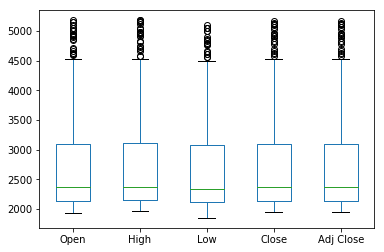

In [22]:
df_index_asia_pacif[["Open", "High", "Low", "Close",'Adj Close']].plot.box()

## Reading more than one time serie and merging it in one dataframe.


In [24]:
#########################################
#                                       #
#              READING DATA             #
#                                       #
#########################################
import pandas_datareader.data as web
import pandas as pd
import time

ticker_asia_pacif =  '000001.SS' # SSE Composite Index (000001.SS) -  Shanghai, China
ticker_europe_africa_middleeast = '^FCHI'  # CAC 40 (^FCHI) - Paris, France
ticker_americas = '^BVSP' # IBOVESPA (^BVSP) - Sao Paolo, Brazil

#YAHOO is very unstable lately, so it is a good idea to insist until it reads. Actually, t can be a good idea to put a
# loop to insist in the job of grabbing the data and waiting 5 seccounds for next try.
run_ok = 0
numb_tries = 0 
while(run_ok == 0) and (numb_tries < 10):
    try:        
        numb_tries += 1
        df_index_asia_pacif = web.DataReader(ticker_asia_pacif,'yahoo','2012-01-12','2017-01-12')
        df_index_europe_africa_middleeast = web.DataReader(ticker_europe_africa_middleeast,'yahoo','2012-01-12','2017-01-12')
        df_index_americas = web.DataReader(ticker_americas,'yahoo','2012-01-12','2017-01-12')      
        run_ok = 1
    except:
        print ("-> PROBLEM WITH YAHOO - SLEEPING 5 seconds")
        time.sleep(5)
        run_ok = 0

df_merged = pd.DataFrame({ 'adj_close_asia_pacif': df_index_asia_pacif['Adj Close'],
                            'adj_close_europe_africa_middleeast': df_index_europe_africa_middleeast['Adj Close'],
                            'adj_close_americas': df_index_americas['Adj Close']},
                        index=sorted(set(df_index_asia_pacif.index).union(df_index_europe_africa_middleeast.index).union(df_index_americas.index))) 
  

Now that we merged data from 3 different countries, holidays are different, so we start having data in one day for one country, but not for others. We have to do something with the missing!

In [27]:
df_merged.head()

adj_close_asia_pacif  adj_close_europe_africa_middleeast  \
2012-01-12           2275.010010                         3199.979980   
2012-01-13           2244.580078                         3196.489990   
2012-01-16           2206.193115                         3225.000000   
2012-01-17           2298.375000                         3269.989990   
2012-01-18           2266.384033                         3264.929932   

            adj_close_americas  
2012-01-12             59921.0  
2012-01-13             59147.0  
2012-01-16             59956.0  
2012-01-17             60646.0  
2012-01-18             61723.0

In [29]:
df_merged.isnull().sum()

adj_close_asia_pacif                  82
adj_close_europe_africa_middleeast    21
adj_close_americas                    61
dtype: int64

Reindexing will insert missing values (NaN) for the dates that were not present in the original set. To cope with this, we can fill the missing by replacing them with the latest available price for each instrument, which is more correct in this context than dropping the rows using dropna.

In [30]:
df_merged = df_merged.fillna(method='ffill')

In [31]:
df_merged.head()

adj_close_asia_pacif  adj_close_europe_africa_middleeast  \
2012-01-12           2275.010010                         3199.979980   
2012-01-13           2244.580078                         3196.489990   
2012-01-16           2206.193115                         3225.000000   
2012-01-17           2298.375000                         3269.989990   
2012-01-18           2266.384033                         3264.929932   

            adj_close_americas  
2012-01-12             59921.0  
2012-01-13             59147.0  
2012-01-16             59956.0  
2012-01-17             60646.0  
2012-01-18             61723.0

If we still have NaN at the begining of the series, we have no choice but drop them, because we don't have a previous data to copy!

In [32]:
df_merged = df_merged.dropna()
df_merged.head()

adj_close_asia_pacif  adj_close_europe_africa_middleeast  \
2012-01-12           2275.010010                         3199.979980   
2012-01-13           2244.580078                         3196.489990   
2012-01-16           2206.193115                         3225.000000   
2012-01-17           2298.375000                         3269.989990   
2012-01-18           2266.384033                         3264.929932   

            adj_close_americas  
2012-01-12             59921.0  
2012-01-13             59147.0  
2012-01-16             59956.0  
2012-01-17             60646.0  
2012-01-18             61723.0

## Let's plot the 3 indexes in the same graph.

Notice %matplotlib noteboook, a feature in jupyter notebooks that allows us to forego using plt.show() everytime we want to see a plot.

In [33]:
#########################################
#       Pandas Built-in Matplotlib      #
#########################################
%matplotlib inline
ax = df_merged[['adj_close_asia_pacif','adj_close_europe_africa_middleeast','adj_close_americas']].plot()
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price')
ax.legend()


As each index has it is one scale, max and min, it is difficult to interpret if we plot them together in the same graph.

So, let's normalize it dividing it by its maximum.

In [34]:
df_merged['norm_adj_close_asia_pacif'] = df_merged['adj_close_asia_pacif'] / df_merged['adj_close_asia_pacif'].max()
df_merged['norm_adj_close_europe_africa_middleeast'] = df_merged['adj_close_europe_africa_middleeast'] / \
    df_merged['adj_close_europe_africa_middleeast'].max()
df_merged['norm_adj_close_americas'] = df_merged['adj_close_americas'] / df_merged['adj_close_americas'].max()


## Plotting normalized indexes in the same graph.

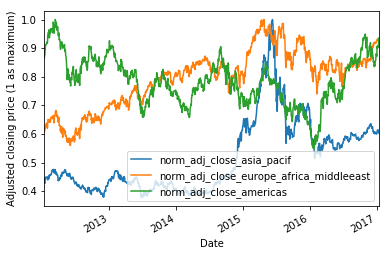

In [35]:
%matplotlib inline
ax = df_merged[['norm_adj_close_asia_pacif','norm_adj_close_europe_africa_middleeast','norm_adj_close_americas']].plot()
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price (1 as maximum)')
ax.legend()

MORE PANDAS BUILT-IN GRAPHS: https://pandas.pydata.org/pandas-docs/stable/visualization.html

## Plotting using Matplotlib own functions

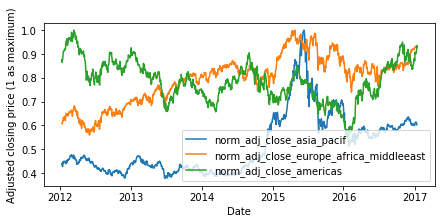

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot everything by leveraging the very powerful matplotlib package
fig = plt.figure(figsize=(7,3))
ax = fig.add_subplot(1,1,1)
ax.plot(df_merged.index, df_merged['norm_adj_close_asia_pacif'], label='norm_adj_close_asia_pacif')
ax.plot(df_merged.index, df_merged['norm_adj_close_europe_africa_middleeast'], label='norm_adj_close_europe_africa_middleeast')
ax.plot(df_merged.index, df_merged['norm_adj_close_americas'], label='norm_adj_close_americas')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price (1 as maximum)')
ax.legend()

# Let's stop a bit to review the slicing power of PANDAS

df_merged[*list_of_names*][*slicing_rule_for_rows*][*slicing_pattern_for_rows*]

Let's only print the normalized columns, and then start printing from row 3, then stop on row 9 with a step of 2.

list = ['norm_adj_close_asia_pacif','norm_adj_close_europe_africa_middleeast','norm_adj_close_americas']

slicing criteria = df_merged['norm_adj_close_asia_pacif'] > 0.39

slicing pattern = 2:10:2


In [37]:
df_merged[['norm_adj_close_asia_pacif','norm_adj_close_europe_africa_middleeast','norm_adj_close_americas']]

norm_adj_close_asia_pacif  \
2012-01-12                   0.440351   
2012-01-13                   0.434461   
2012-01-16                   0.427031   
2012-01-17                   0.444874   
2012-01-18                   0.438682   
2012-01-19                   0.444429   
2012-01-20                   0.448889   
2012-01-23                   0.448889   
2012-01-24                   0.448889   
2012-01-25                   0.448889   
2012-01-26                   0.448889   
2012-01-27                   0.448889   
2012-01-30                   0.442293   
2012-01-31                   0.443758   
2012-02-01                   0.439010   
2012-02-02                   0.447619   
2012-02-03                   0.451074   
2012-02-06                   0.451215   
2012-02-07                   0.443621   
2012-02-08                   0.454388   
2012-02-09                   0.454787   
2012-02-10                   0.455250   
2012-02-13                   0.455225   
2012-02-14                   0.453854   
2012-02-15                   0.458099   
2012-02-16                   0.456194   
2012-02-17                   0.456257   
2012-02-20                   0.457498   
2012-02-21                   0.460950   
2012-02-22                   0.465239   
...                               ...   
2016-12-05                   0.620304   
2016-12-06                   0.619324   
2016-12-07                   0.623698   
2016-12-08                   0.622367   
2016-12-09                   0.625758   
2016-12-12                   0.610290   
2016-12-13                   0.610690   
2016-12-14                   0.607882   
2016-12-15                   0.603458   
2016-12-16                   0.604485   
2016-12-19                   0.603537   
2016-12-20                   0.600593   
2016-12-21                   0.607282   
2016-12-22                   0.607694   
2016-12-23                   0.602002   
2016-12-26                   0.604405   
2016-12-27                   0.602875   
2016-12-28                   0.600470   
2016-12-29                   0.599281   
2016-12-30                   0.600741   
2017-01-02                   0.600741   
2017-01-03                   0.606990   
2017-01-04                   0.611417   
2017-01-05                   0.612698   
2017-01-06                   0.610551   
2017-01-09                   0.613825   
2017-01-10                   0.611974   
2017-01-11                   0.607151   
2017-01-12                   0.603770   
2017-01-13                   0.602507   

            norm_adj_close_europe_africa_middleeast  norm_adj_close_americas  
2012-01-12                                 0.607332                 0.876115  
2012-01-13                                 0.606670                 0.864798  
2012-01-16                                 0.612081                 0.876627  
2012-01-17                                 0.620620                 0.886715  
2012-01-18                                 0.619659                 0.902462  
2012-01-19                                 0.631808                 0.905445  
2012-01-20                                 0.630396                 0.911074  
2012-01-23                                 0.633607                 0.912156  
2012-01-24                                 0.630614                 0.913618  
2012-01-25                                 0.628684                 0.913618  
2012-01-26                                 0.638316                 0.920446  
2012-01-27                                 0.629876                 0.919730  
2012-01-30                                 0.619794                 0.917771  
2012-01-31                                 0.626040                 0.922186  
2012-02-01                                 0.639119                 0.944045  
2012-02-02                                 0.640865                 0.944425  
2012-02-03                                 0.650594                 0.953549  
2012-02-06                                 0.64

In [38]:
df_merged['norm_adj_close_asia_pacif'] > 0.39

2012-01-12    True
2012-01-13    True
2012-01-16    True
2012-01-17    True
2012-01-18    True
2012-01-19    True
2012-01-20    True
2012-01-23    True
2012-01-24    True
2012-01-25    True
2012-01-26    True
2012-01-27    True
2012-01-30    True
2012-01-31    True
2012-02-01    True
2012-02-02    True
2012-02-03    True
2012-02-06    True
2012-02-07    True
2012-02-08    True
2012-02-09    True
2012-02-10    True
2012-02-13    True
2012-02-14    True
2012-02-15    True
2012-02-16    True
2012-02-17    True
2012-02-20    True
2012-02-21    True
2012-02-22    True
              ... 
2016-12-05    True
2016-12-06    True
2016-12-07    True
2016-12-08    True
2016-12-09    True
2016-12-12    True
2016-12-13    True
2016-12-14    True
2016-12-15    True
2016-12-16    True
2016-12-19    True
2016-12-20    True
2016-12-21    True
2016-12-22    True
2016-12-23    True
2016-12-26    True
2016-12-27    True
2016-12-28    True
2016-12-29    True
2016-12-30    True
2017-01-02    True
2017-01-03  

In [39]:
df_merged[df_merged['norm_adj_close_asia_pacif'] > 0.39]

adj_close_asia_pacif  adj_close_europe_africa_middleeast  \
2012-01-12           2275.010010                         3199.979980   
2012-01-13           2244.580078                         3196.489990   
2012-01-16           2206.193115                         3225.000000   
2012-01-17           2298.375000                         3269.989990   
2012-01-18           2266.384033                         3264.929932   
2012-01-19           2296.074951                         3328.939941   
2012-01-20           2319.117920                         3321.500000   
2012-01-23           2319.117920                         3338.419922   
2012-01-24           2319.117920                         3322.649902   
2012-01-25           2319.117920                         3312.479980   
2012-01-26           2319.117920                         3363.229980   
2012-01-27           2319.117920                         3318.760010   
2012-01-30           2285.038086                         3265.639893   
2012-01-31           2292.610107                         3298.550049   
2012-02-01           2268.080078                         3367.459961   
2012-02-02           2312.555908                         3376.659912   
2012-02-03           2330.405029                         3427.919922   
2012-02-06           2331.135986                         3405.270020   
2012-02-07           2291.902100                         3411.540039   
2012-02-08           2347.530029                         3410.000000   
2012-02-09           2349.589111                         3424.709961   
2012-02-10           2351.980957                         3373.139893   
2012-02-13           2351.854004                         3384.550049   
2012-02-14           2344.770996                         3375.639893   
2012-02-15           2366.701904                         3390.350098   
2012-02-16           2356.860107                         3393.250000   
2012-02-17           2357.180908                         3439.620117   
2012-02-20           2363.596924                         3472.540039   
2012-02-21           2381.429932                         3465.239990   
2012-02-22           2403.586914                         3447.370117   
...                          ...                                 ...   
2016-12-05           3204.708984                         4574.319824   
2016-12-06           3199.646973                         4631.939941   
2016-12-07           3222.241943                         4694.720215   
2016-12-08           3215.365967                         4735.479980   
2016-12-09           3232.883057                         4764.069824   
2016-12-12           3152.969971                         4760.770020   
2016-12-13           3155.037109                         4803.870117   
2016-12-14           3140.531006                         4769.240234   
2016-12-15           3117.677002                         4819.229980   
2016-12-16           3122.981934                         4833.270020   
2016-12-19           3118.084961                         4822.770020   
2016-12-20           3102.875977                         4849.890137   
2016-12-21           3137.429932                         4833.819824   
2016-12-22           3139.558105                         4834.629883   
2016-12-23           3110.154053                         4839.680176   
2016-12-26           3122.569092                         4839.680176   
2016-12-27           3114.664062                         4848.279785   
2016-12-28           3102.236084                         4848.009766   
2016-12-29           3096.096924                         4838.470215   
2016-12-30           3103.636963                         4862.310059   
2017-01-02           3103.636963                         4882.379883   
2017-01-03           3135.920898                         4899.330078   
2017-01-04           3158.793945                         4899.399902   
2017-01-05           3165.410889                    

In [40]:
df_merged[2:10:2]

adj_close_asia_pacif  adj_close_europe_africa_middleeast  \
2012-01-16           2206.193115                         3225.000000   
2012-01-18           2266.384033                         3264.929932   
2012-01-20           2319.117920                         3321.500000   
2012-01-24           2319.117920                         3322.649902   

            adj_close_americas  norm_adj_close_asia_pacif  \
2012-01-16             59956.0                   0.427031   
2012-01-18             61723.0                   0.438682   
2012-01-20             62312.0                   0.448889   
2012-01-24             62486.0                   0.448889   

            norm_adj_close_europe_africa_middleeast  norm_adj_close_americas  
2012-01-16                                 0.612081                 0.876627  
2012-01-18                                 0.619659                 0.902462  
2012-01-20                                 0.630396                 0.911074  
2012-01-24                                 0.630614                 0.913618

## Combining criterias

In [41]:
df_merged[['norm_adj_close_asia_pacif','norm_adj_close_europe_africa_middleeast','norm_adj_close_americas']][2:10:2]


norm_adj_close_asia_pacif  \
2012-01-16                   0.427031   
2012-01-18                   0.438682   
2012-01-20                   0.448889   
2012-01-24                   0.448889   

            norm_adj_close_europe_africa_middleeast  norm_adj_close_americas  
2012-01-16                                 0.612081                 0.876627  
2012-01-18                                 0.619659                 0.902462  
2012-01-20                                 0.630396                 0.911074  
2012-01-24                                 0.630614                 0.913618

In [42]:
df_merged[['norm_adj_close_asia_pacif','norm_adj_close_europe_africa_middleeast','norm_adj_close_americas']][df_merged['norm_adj_close_asia_pacif'] > 0.4][2:10:2]

norm_adj_close_asia_pacif  \
2012-01-16                   0.427031   
2012-01-18                   0.438682   
2012-01-20                   0.448889   
2012-01-24                   0.448889   

            norm_adj_close_europe_africa_middleeast  norm_adj_close_americas  
2012-01-16                                 0.612081                 0.876627  
2012-01-18                                 0.619659                 0.902462  
2012-01-20                                 0.630396                 0.911074  
2012-01-24                                 0.630614                 0.913618

---

# Type of graphs - Static vs. Dynamic

<img src="MatplotLib_Bokeh.png" width=1000 height=800 align="left">

## Bokeh

In [43]:
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
import numpy as np

def datetime_transf(x):
    return np.array(x, dtype=np.datetime64)

p1 = figure(x_axis_type="datetime", title='Adjusted closing price (1 as maximum)')
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'
p1.line(datetime_transf(df_merged.index), df_merged['norm_adj_close_asia_pacif'], color='#A6CEE3', legend=ticker_asia_pacif)
p1.line(datetime_transf(df_merged.index), df_merged['norm_adj_close_europe_africa_middleeast'], color='#B2DF8A', 
        legend=ticker_europe_africa_middleeast)
p1.line(datetime_transf(df_merged.index), df_merged['norm_adj_close_americas'], color='#FB9A99', legend=ticker_americas)
output_file("three_indexes.html", title="Manoel Gadi Example")
show(gridplot([[p1]], plot_width=600, plot_height=600))  # open a browser    

https://demo.bokehplots.com/

---

# Further references on graphs

## Matplotlib

Below is a introduction to the main graphing packages that python has. We'll focus on:

- Matplotlib (pyplot specifically)
- Seaborn (Statistical plots package)

First we load the required libraries. Notice %matplotlib inline, a feature in jupyter notebooks that allows us to forego using plt.show() everytime we want to see a plot.


__BUG: There is a bug on ggplot that need fixing to access the sample data:__
https://github.com/yhat/ggpy/issues/662

In [44]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.style
%matplotlib inline

#data
#from ggplot import diamonds
#from ggplot import mtcars

In [45]:
diamonds =  pd.read_csv("diamonds.csv")

We import the Diamonds and the Mtcars dataset to make some plots.

In [46]:
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [47]:
mtcars = pd.read_csv("mtcars.csv")

In [48]:
mtcars.head()

model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

We look at the data in some more detail to make sure we know what kind of variables it has. For plotting it is extremely important that we know whether a variable is categorical or numerical.

In [49]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Let's start with how we make a simple plots, there is different ways to tell matplotlib what columns we want to focus on.

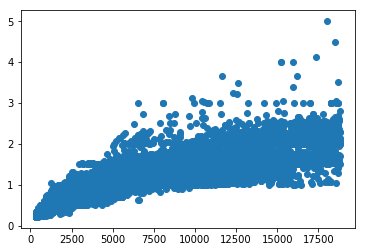

In [50]:
# 2 Ways of calling variables :
#Brackets
plt.scatter( 
x = diamonds['price'], 
y = diamonds['carat'])

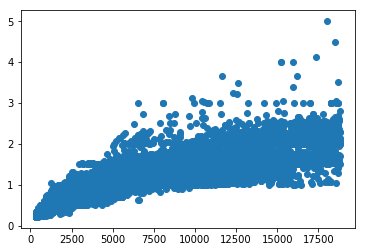

In [51]:
#Dots
plt.scatter(
x = diamonds.price,
y = diamonds.carat)


We also can very easily set themes for our plots with matplotlib.style.use. For all of you ggplot fans we can get that look back!

In [52]:
# Personnalize your matplotlib

matplotlib.style.use('ggplot')
matplotlib.style.use('dark_background')

plt.style.use('default')


### Main plots that are used
- plt.hist()
- plt.bar()
- plt.plot()
- plt.scatter()

### Plotting a simple scatter plot

Using the diamonds dataset to do a simple scatter plot

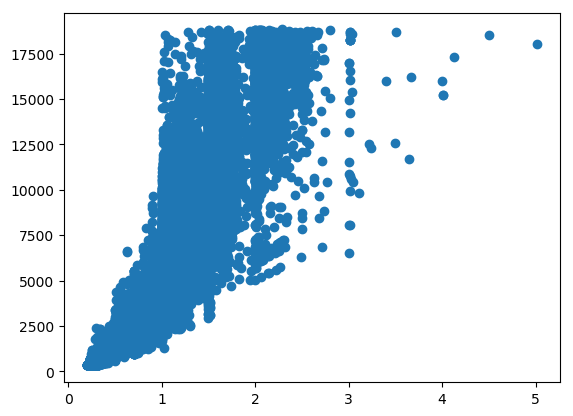

In [53]:
plt.scatter(x=diamonds.carat,y=diamonds.price)

### Customizing the plot title and axis title

We could use xlabel and ylabel to add axis titles in the graph


Text(0.5, 1.0, 'Diamonds')

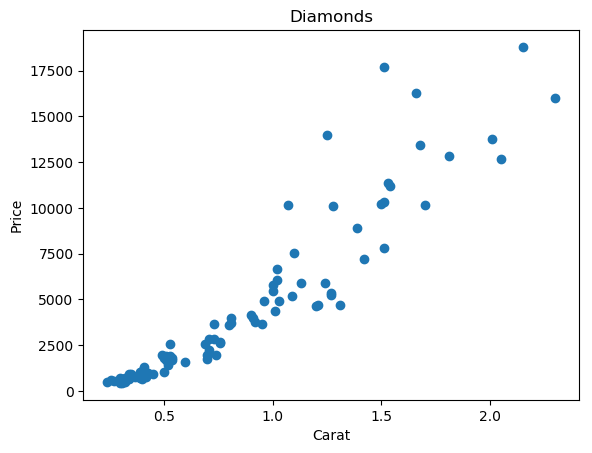

In [54]:
df=diamonds.sample(100,random_state=22)
plt.scatter(x=df.carat,y=df.price)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Diamonds")

### Customizing: Changing the shape

We could use the marker function in plt.scatter to to change the shape of the chart

Text(0.5, 1.0, 'Diamonds')

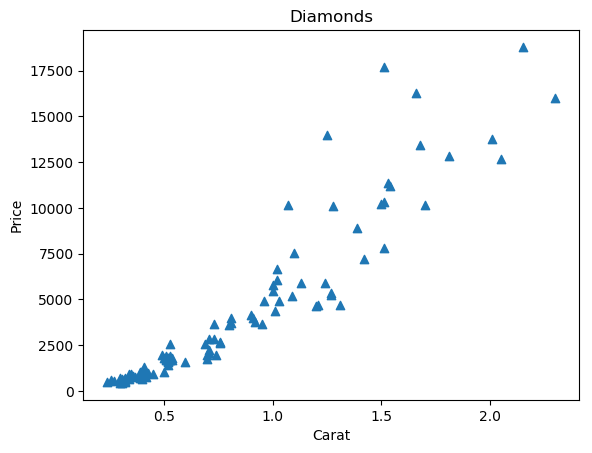

In [55]:
plt.scatter(x=df.carat,y=df.price,marker='^')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Diamonds")

### Customizing : Changing the color (Option 1)

We could change the color by adding the parameter c=(color code) in plt.scatter

In [56]:
plt.scatter(x=df.carat,y=df.price,c='g',
marker='2')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Diamonds")

Text(0.5, 1.0, 'Diamonds')

### Customizing: Changing the color (Option 2)

We could also change the color by using the hexadecimal format

In [57]:
plt.scatter(x=df.carat,y=df.price,c='#0000FF',
marker='2')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Diamonds")

Text(0.5, 1.0, 'Diamonds')

### Customizing: Annotations

We could add annotations using plt.annotate to highlight outliers or influencers

Text(3, 5, 'Costliest Diamond')

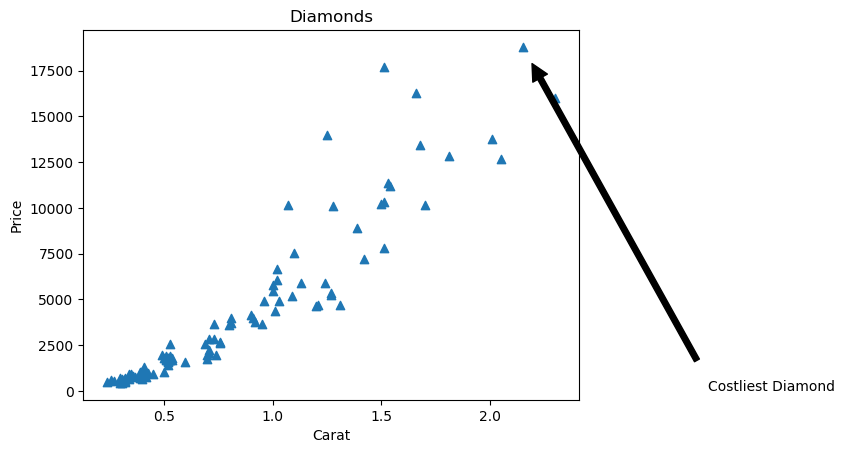

In [58]:
plt.scatter(x=df.carat,y=df.price,marker='^')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Diamonds")
y_max=max(df.price)
x_max=df.carat[df.price==y_max]
plt.annotate('Costliest Diamond', xy=(x_max,y_max), xytext=(3, 5),
    arrowprops=dict(facecolor='black', shrink=0.05))

### Customizing: Addining an equation to chart

We could add an equation to an existing chart by using the plt.text function

Text(1.17, 2500, 'ln(y) = $b_0 + \\sum_{j=1}^p b_j*x_j$')

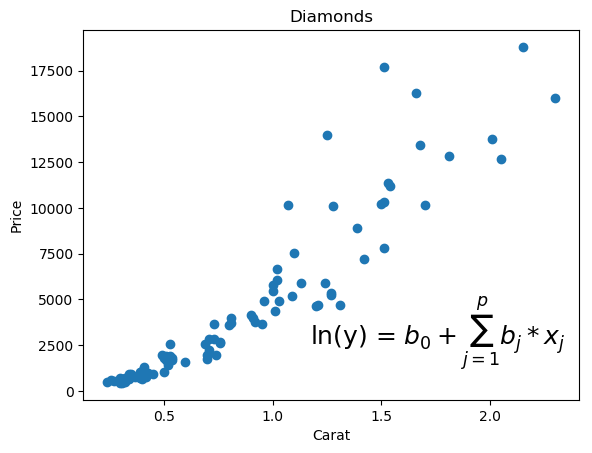

In [59]:
plt.scatter (x=df.carat,y=df.price)
plt.xlabel ("Carat")
plt.ylabel ("Price")
plt.title ("Diamonds")
plt.text(1.17, 2500, r'ln(y) = $b_0 + \sum_{j=1}^p b_j*x_j$', fontsize=18)

### Extra customization
First, a simple plot. We take a sample to make customization clearer.

0.33999999999999997
2.5999999999999996


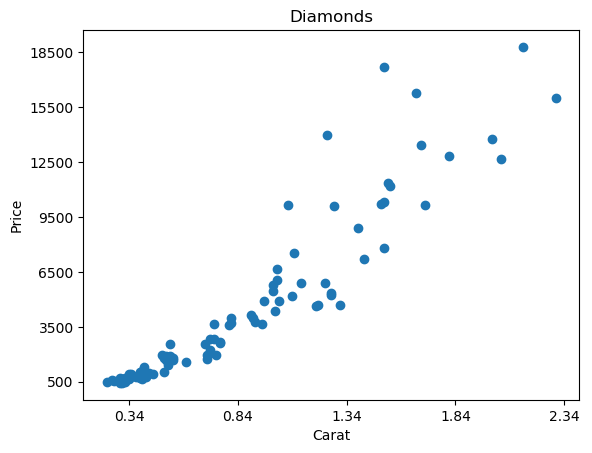

In [17]:
#first graph simple xticks and yticks
plt.scatter(df.carat,df.price,)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.xticks(np.arange(min(df.carat)+0.1, max(df.carat)+0.3, 0.5))
plt.yticks(np.arange(500, max(df.price)+2000, 3000))
plt.title("Diamonds")
print(min(df.carat)+0.1)
print( max(df.carat)+0.3)

And now with a tight layout

In [18]:
#the same with tight layout
plt.scatter(df.carat,df.price,)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Diamonds")
plt.tight_layout()

Let's add some limits on the axis.

In [19]:
# xlim and y lim
plt.scatter(df.carat,df.price,)
plt.hist(df.carat)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.xlim(0,3)
plt.ylim(0,18000)
plt.title("Diamonds")

Text(0.5, 1.0, 'Diamonds')

Let's look at double axes.

## Seaborn statistical plots
### First Univariate plots

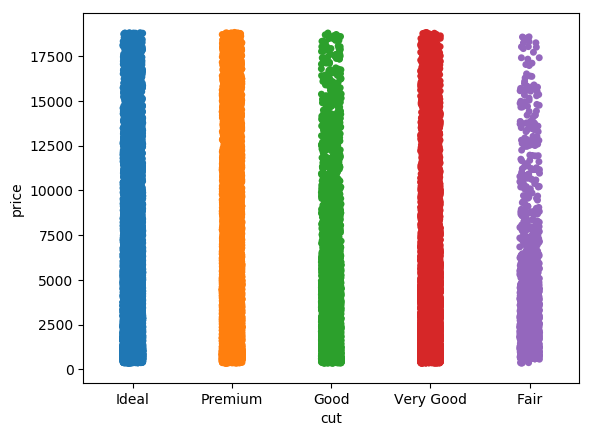

In [20]:
sns.stripplot(x='cut', y='price', data=diamonds)

Swarmplot is similar but spreads out points, it's slow! careful with it. Better for visibility.

In [21]:
sns.swarmplot(x='cyl', y='mpg', data=mtcars)

A violinplot is a version of a boxplot that shows where most of the datapoints are located.

In [22]:
sns.violinplot(x='cut', y='price', data=diamonds)

### Multivariate plots
Jointplot combines a scatter plot with some correlation information and distribution of the points (histograms).

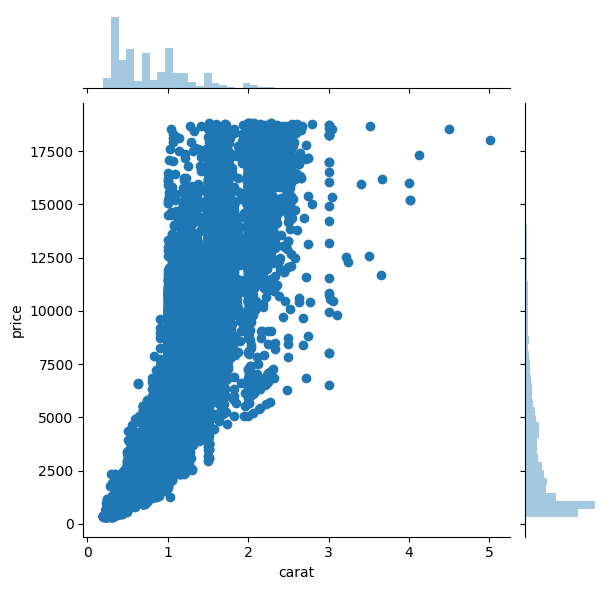

In [23]:
sns.jointplot(x='carat', y='price', data=diamonds)

A pairplot makes plots for each combinations of variables.

In [24]:
sns.pairplot(data=diamonds)

## We can also customize the color based on a different variable.

The next code takes too much time and resource, you can try running at your own risk! I don't recommend!

In [34]:
#sns.pairplot(data=diamonds, hue='carat')

---

Let's also look at correlations between the numerical variables and plot them in a heatmap.

In [31]:
diamonds2 = diamonds.drop(diamonds.columns[[1, 2, 3]], axis=1)

In [32]:
diamonds2.head()

carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31
2   0.23   56.9   65.0    327  4.05  4.07  2.31
3   0.29   62.4   58.0    334  4.20  4.23  2.63
4   0.31   63.3   58.0    335  4.34  4.35  2.75

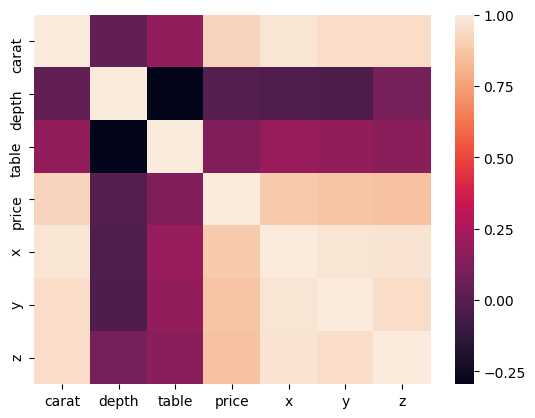

In [33]:
covars = diamonds2.corr()
sns.heatmap(covars)

### statistical plots
Seaborn is really good for statistics. Automatically including regression lines with lmplot.

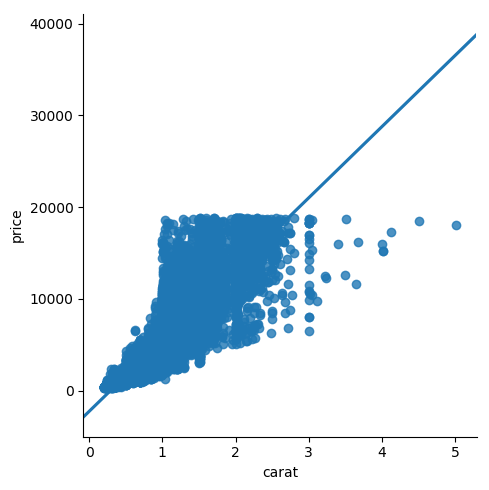

In [26]:
sns.lmplot(x='carat', y='price', data=diamonds)

Customization is a bit tricky because you need to access the underlying matplotlib code with a dictionary.

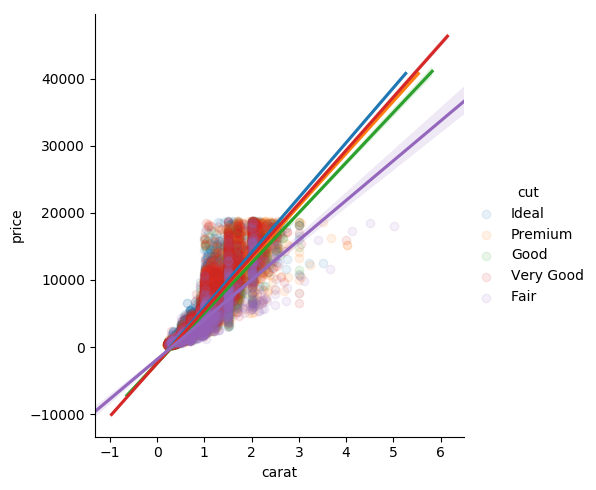

In [27]:
sns.lmplot(x='carat', y='price', data=diamonds, hue='cut', scatter_kws={'alpha':0.1})

We can also do a regplot which allows for higher order polynomial regressions.

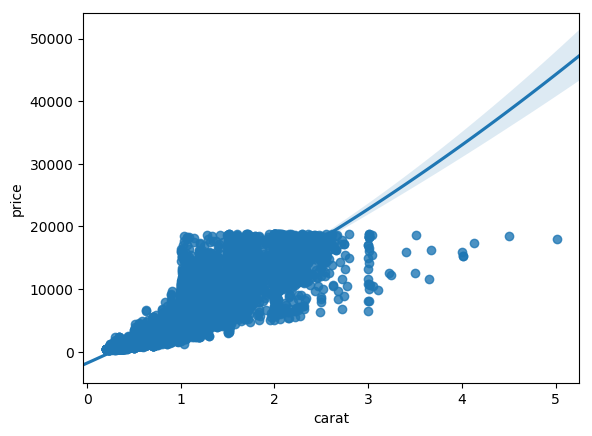

In [28]:
sns.regplot(x='carat', y='price', data=diamonds, order=2)

Residual analysis is also very easy.

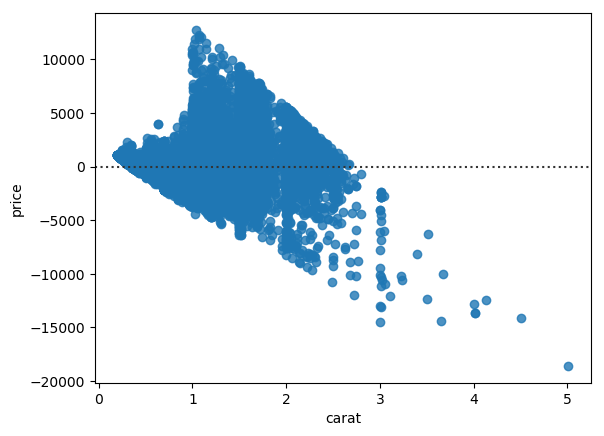

In [29]:
sns.residplot(x='carat', y='price', data=diamonds)

And finally, just a simple boxplot!

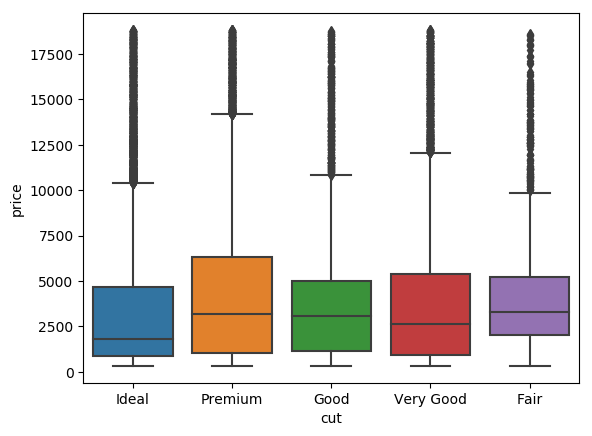

In [30]:
sns.boxplot(x='cut', y='price', data=diamonds)